In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
import scikitplot as skplt
import graphviz
from sklearn import tree

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import LeakyReLU
from keras import optimizers


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
import math

warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [2]:
data = pd.read_csv('F:/Subhiksha/GAIP Internship/NUS Session/NUS Project Documents/Phishing Detection/phishcoop.csv')
data = data.drop(columns = "id")
data.head(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [4]:
x = data.iloc[ : , :-1].values
y = data.iloc[:, -1:].values

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1,random_state = 8)

In [6]:
treemod = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf = 10 , min_impurity_decrease = 0.01)
treemod.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree Accuracy: 0.9113924050632911


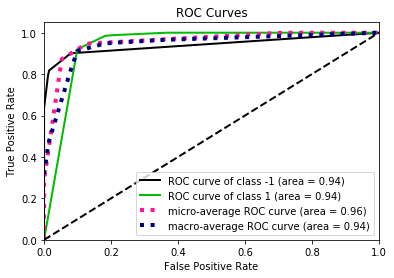

In [7]:
pred = treemod.predict(xtest)
cm = confusion_matrix(ytest,pred)
correct_pred = sum([cm[k][k] for k in range(cm.shape[0])])
acc = correct_pred/xtest.shape[0]
print('Decision Tree Accuracy: {}'.format(acc))
p = treemod.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, p)
plt.show()

In [8]:
data1 = data.drop(columns=['Result'])
dot_data = tree.export_graphviz(treemod, out_file=None, feature_names=data1.columns, 
                                class_names=["-1","1"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Phishing.pdf")

'Phishing.pdf.pdf'

In [9]:
pred = treemod.predict(x)
data['DT'] = pred

Linear Model Accuracy: 0.930379746835443


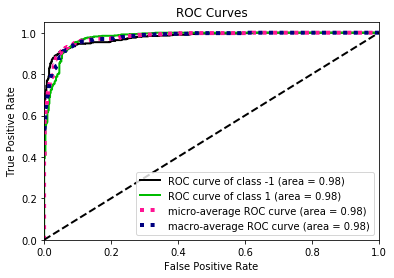

In [10]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
log.fit(xtrain, ytrain)
pred = log.predict(xtest)
cm = confusion_matrix(ytest,pred)
correct_pred = sum([cm[k][k] for k in range(cm.shape[0])])
acc = correct_pred/xtest.shape[0]
print('Linear Model Accuracy: {}'.format(acc))
p = log.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, p)
plt.show()

In [11]:
pred = log.predict(x)
data['LR'] = pred

SVM Rbf Accuracy: 0.9466546112115732


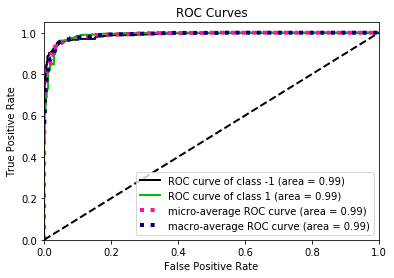

array([[465,  39],
       [ 20, 582]], dtype=int64)

In [12]:
svc = SVC(kernel = 'rbf',probability=True)
svc.fit(xtrain,ytrain)
pred = svc.predict(xtest)
cm = confusion_matrix(ytest,pred)
correct_pred = sum([cm[k][k] for k in range(cm.shape[0])])
acc = correct_pred/xtest.shape[0]
print('SVM Rbf Accuracy: {}'.format(acc))
p = svc.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, p)
plt.show()
cm

In [13]:
pred = svc.predict(x)
data['SVM'] = pred

In [14]:
r_state = random.randint(0,round(random.random() * 1000))

In [15]:
max_i = 0
max_acc = 0
for i in [j*10 for j in range(1,10)]:
 rf = RandomForestClassifier(max_depth = i, random_state=r_state)
 rf.fit(xtrain, ytrain)
 pred = rf.predict(xtest)
 pred
 cm = confusion_matrix(ytest,pred)
 correct_pred = sum([cm[k][k] for k in range(cm.shape[0])])
 acc = correct_pred/xtest.shape[0]
 if(acc > max_acc):
  max_acc = acc
  max_i = i

Random Forest Accuracy: 0.9783001808318263


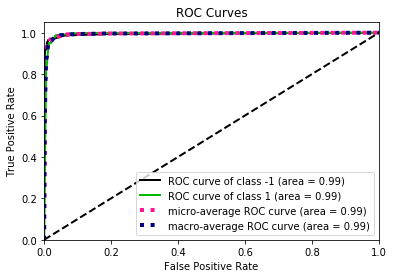

In [16]:
max_dep = 2
max_acc = 0
for i in [j for j in range(max_i-10,max_i+10)]:
 rf = RandomForestClassifier(max_depth = i, random_state=r_state)
 rf.fit(xtrain , list(ytrain))
 pred = rf.predict(xtest)
 cm = confusion_matrix(ytest,pred)
 correct_pred = sum([cm[k][k] for k in range(cm.shape[0])])
 acc = correct_pred/xtest.shape[0]
 if(acc > max_acc):
  max_dep = i
  max_acc = acc
print('Random Forest Accuracy: {}'.format(max_acc))
p = rf.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, p)
plt.show()

In [17]:
pred = rf.predict(x)
data['RF'] = pred

In [18]:
data.head(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,DT,LR,SVM,RF
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,-1,1,1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,-1,1,1,1,-1,1,1,-1,-1


XGBoost Accuracy: 0.9701627486437613


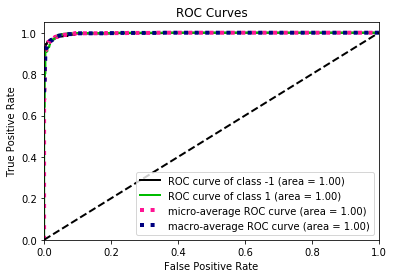

In [19]:
xgbmod = XGBClassifier(learning_rate =0.3,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgbmod.fit(xtrain,ytrain)
pred = xgbmod.predict(xtest)
cm = confusion_matrix(ytest,pred)
correct_pred = sum([cm[k][k] for k in range(cm.shape[0])])
acc = correct_pred/xtest.shape[0]
print('XGBoost Accuracy: {}'.format(acc))
p = xgbmod.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, p)
plt.show()

In [20]:
pred = xgbmod.predict(x)
data['XGB'] = pred

In [21]:
data.head(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,DT,LR,SVM,RF,XGB
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,1,1,1,-1,1,1,-1,-1,-1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 36 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [23]:
data.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,DT,LR,SVM,RF,XGB
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,-0.091774,0.029153,-0.339065,-0.019103,0.094160,0.089065,0.100427,0.099792,0.096618,0.094177
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,0.183518,0.002902,-0.022987,-0.067153,0.057430,0.031705,0.056744,0.067624,0.057010,0.056696
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.014591,0.155844,-0.198410,0.085461,-0.067966,-0.059085,-0.073266,-0.072655,-0.066639,-0.066137
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,-0.064735,0.037061,-0.006080,-0.080357,0.052948,0.049557,0.056693,0.056771,0.053510,0.053691
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,-0.003132,0.178415,-0.194165,0.070390,-0.038608,-0.032924,-0.037405,-0.040602,-0.037277,-0.036771
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.006834,0.067781,0.067423,-0.002763,0.348606,0.290056,0.340562,0.340499,0.346884,0.348414
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,0.120730,0.057673,-0.010526,0.081627,0.298323,0.265284,0.305873,0.309888,0.295882,0.294735
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,0.074545,0.096051,-0.011710,0.063411,0.714741,0.905991,0.791370,0.791339,0.716397,0.710841
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,-0.059898,-0.039766,0.122672,-0.002212,-0.225789,-0.218892,-0.240849,-0.247967,-0.225515,-0.220773
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.011699,-0.016668,-0.127243,0.300917,-0.000280,-0.005287,0.004691,0.001960,0.001601,-0.000019


In [24]:
seed = 7
np.random.seed(seed)

In [25]:
x = data.drop(columns=['Result']).values
y = data['Result']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)

In [26]:
def create_baseline():
    model = Sequential()
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(35, input_dim=35, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [27]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=5, batch_size=100, verbose=0)
kfold = StratifiedKFold(n_splits=100, shuffle=True, random_state=seed)
results = cross_val_score(estimator, xtrain, ytrain, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Results: 98.73% (1.15%)


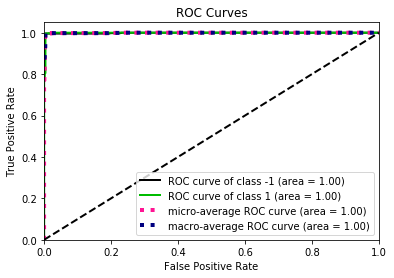

Neural Network Results: 98.73% (1.15%)


In [28]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=5, batch_size=100, verbose=0)
estimator.fit(xtrain,ytrain)
y_pred_proba = estimator.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, y_pred_proba)
plt.show()
print("Neural Network Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

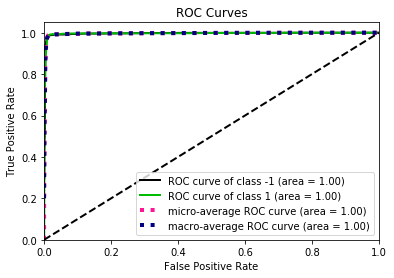

Neural Network Results Training: 98.73% (1.15%)


In [29]:
y_pred_proba = estimator.predict_proba(xtrain)
skplt.metrics.plot_roc_curve(ytrain, y_pred_proba)
plt.show()
print("Neural Network Results Training: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))